In [1]:
import pandas as pd

#### Read the data

In [2]:
data = pd.read_csv('../datasets/pima_indians_diabetes.csv')
data.head(3)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [3]:
X = data.iloc[:,0:8]
y = data.iloc[:,8]

In [4]:
X.head(3)

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32


In [5]:
y.head(3)

0    1
1    0
2    1
Name: class, dtype: int64

#### Split data into train and test

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

## Classification using Bagging 

In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
base_model = LogisticRegression(max_iter=400)

In [10]:
bagg_model = BaggingClassifier(base_estimator=base_model, n_estimators=20)

In [11]:
bagg_model.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=400),
                  n_estimators=20)

#### Predict for training data and get the metrics

In [12]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score,roc_curve

In [13]:
yhat_train = bagg_model.predict(X_train)

In [14]:
cm = confusion_matrix(y_train, yhat_train)
cm

array([[353,  48],
       [ 93, 120]])

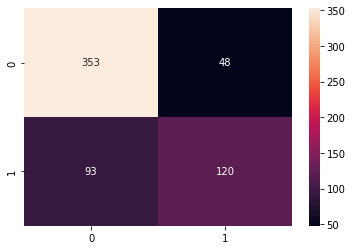

In [15]:
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [16]:
print(classification_report(y_train,yhat_train))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       401
           1       0.71      0.56      0.63       213

    accuracy                           0.77       614
   macro avg       0.75      0.72      0.73       614
weighted avg       0.76      0.77      0.76       614



#### Predict for testing data and get the metrics

In [17]:
yhat_test = bagg_model.predict(X_test)

In [18]:
cm = confusion_matrix(y_test, yhat_test)
cm

array([[78, 21],
       [18, 37]])

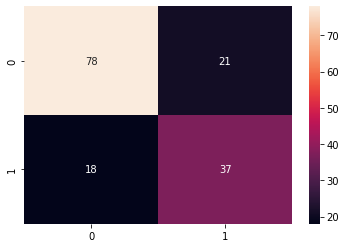

In [19]:
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [20]:
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



## RandomForest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf_model = RandomForestClassifier(n_estimators=20,max_depth=4)

In [23]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=20)

#### Predict for training data and get the metrics

In [24]:
yhat_train = rf_model.predict(X_train)

In [25]:
cm = confusion_matrix(y_train, yhat_train)
cm

array([[380,  21],
       [ 85, 128]])

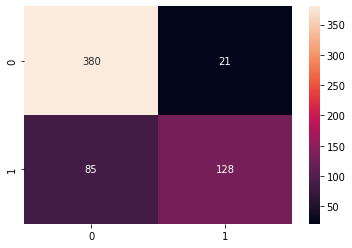

In [26]:
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [27]:
print(classification_report(y_train,yhat_train))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       401
           1       0.86      0.60      0.71       213

    accuracy                           0.83       614
   macro avg       0.84      0.77      0.79       614
weighted avg       0.83      0.83      0.82       614



In [28]:
proba_true = rf_model.predict_proba(X_train)[:,1]
fpr,tpr,threshold = roc_curve(y_train,proba_true)
auc = roc_auc_score(y_train,yhat_train)
auc

0.7742849449147086

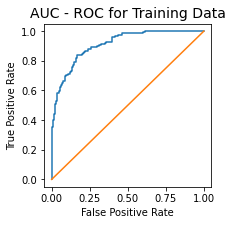

In [29]:
plt.figure(figsize=(3,3))
plt.title('AUC - ROC for Training Data', fontsize=14)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.show()

#### Predict for testing data and get the metrics

In [30]:
yhat_test = rf_model.predict(X_test)

In [31]:
cm = confusion_matrix(y_test, yhat_test)
cm

array([[87, 12],
       [20, 35]])

In [32]:
print(classification_report(y_test,yhat_test))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



## ADABoost

In [33]:
from sklearn.ensemble import AdaBoostClassifier

In [34]:
ada_model = AdaBoostClassifier(n_estimators=25)

In [35]:
## Homework - Complete this
## Add the roc curve for all the models

## Stacking Model

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [37]:
estimators = []

In [38]:
lr_model = LogisticRegression(max_iter=400)
estimators.append(('lreg',lr_model))

In [39]:
dt_model = DecisionTreeClassifier(max_depth=8)
estimators.append(('dt',dt_model))

In [40]:
sv_model = SVC()
estimators.append(('svm',sv_model))

In [41]:
ens_model = VotingClassifier(estimators=estimators)

In [42]:
ens_model.fit(X_train,y_train)

VotingClassifier(estimators=[('lreg', LogisticRegression(max_iter=400)),
                             ('dt', DecisionTreeClassifier(max_depth=8)),
                             ('svm', SVC())])

#### Predict for training data and get the metrics

In [43]:
yhat_train = ens_model.predict(X_train)

In [44]:
cm = confusion_matrix(y_train, yhat_train)
cm

array([[373,  28],
       [ 87, 126]])

In [45]:
print(classification_report(y_train,yhat_train))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       401
           1       0.82      0.59      0.69       213

    accuracy                           0.81       614
   macro avg       0.81      0.76      0.78       614
weighted avg       0.81      0.81      0.80       614



#### Predict for training data and get the metrics

In [46]:
yhat_test = ens_model.predict(X_test)

In [47]:
cm = confusion_matrix(y_test, yhat_test)
cm

array([[80, 19],
       [19, 36]])

In [48]:
print(classification_report(y_test,yhat_test))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

